## 0. Install and Import Dependencies

In [18]:
# Install pytorch
#https://pytorch.org/get-started/locally/
# Install easyocr 

!pip install opencv-python==3.4.0.14

     ---------------------------------------- 0.0/87.3 MB ? eta -:--:--
     --------------------------------------- 0.0/87.3 MB 660.6 kB/s eta 0:02:13
     --------------------------------------- 0.0/87.3 MB 653.6 kB/s eta 0:02:14
     --------------------------------------- 0.1/87.3 MB 656.4 kB/s eta 0:02:13
     --------------------------------------- 0.1/87.3 MB 656.4 kB/s eta 0:02:13
     --------------------------------------- 0.1/87.3 MB 656.4 kB/s eta 0:02:13
     --------------------------------------- 0.2/87.3 MB 612.6 kB/s eta 0:02:23
     --------------------------------------- 0.2/87.3 MB 612.6 kB/s eta 0:02:23
     --------------------------------------- 0.2/87.3 MB 593.2 kB/s eta 0:02:27
     --------------------------------------- 0.2/87.3 MB 573.4 kB/s eta 0:02:32
     --------------------------------------- 0.3/87.3 MB 562.4 kB/s eta 0:02:35
     --------------------------------------- 0.3/87.3 MB 614.4 kB/s eta 0:02:22
     --------------------------------------- 0.4

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
         ---------------------------------------- 0.0/84.3 kB ? eta -:--:--
         ------------------- -------------------- 41.0/84.3 kB 1.9 MB/s eta 0:00:01
         ---------------------------------------- 84.3/84.3 kB 1.6 MB/s eta 0:00:00
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\prabh\AppData\Local\Temp\pip-install-atelaqdv\opencv-python_c6fdbb1a054e4df1b6d4b2d33793c83e\setup.py", line 373, in <module>
          main()
        File "C:\Users\prabh\AppData\Local\Temp\pip-install-atelaqdv\opencv-python_c6fdbb1a054e4df1b6d4b2d33793c83e\setup.py", line 76, in main
          ['python/([^/]+/){1,2}cv2[^/]*%(ext)s' % {'ext': re.escape(sysconfig.get_config_var('SO'))}],
                                                       

In [19]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 1. Read in images or video

In [50]:
IMAGE_PATH = 'aadhar1.jpeg'
#IMAGE_PATH = 'surf.jpeg'

In [51]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[460, 158], [524, 158], [524, 184], [460, 184]], 'MRT', 0.3768778570313753),
 ([[532, 158], [614, 158], [614, 184], [532, 184]],
  'HrER',
  0.06851549446582794),
 ([[418, 186], [654, 186], [654, 212], [418, 212]],
  'GOVERNMENT OF INDIA',
  0.989994932873659),
 ([[357, 229], [479, 229], [479, 265], [357, 265]],
  's0686',
  0.42170899259126127),
 ([[362, 276], [516, 276], [516, 306], [362, 306]],
  'Name XXXX',
  0.9992611235312325),
 ([[362, 306], [600, 306], [600, 336], [362, 336]],
  'DOB: XX-XX-XXXX',
  0.9965055624198419),
 ([[362, 338], [550, 338], [550, 368], [362, 368]],
  'Gender: MALE',
  0.8209236286122255),
 ([[351, 437], [627, 437], [627, 479], [351, 479]],
  '0000 M1 2222',
  0.6259106119481269),
 ([[311, 495], [680, 495], [680, 533], [311, 533]],
  '31e11r - 34 314ft #T3ferR',
  0.023172892122135406)]

## 2. Draw Results 

In [52]:
detected_text_list = []
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

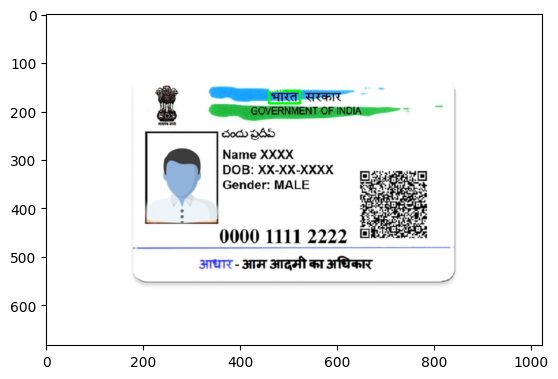

In [53]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

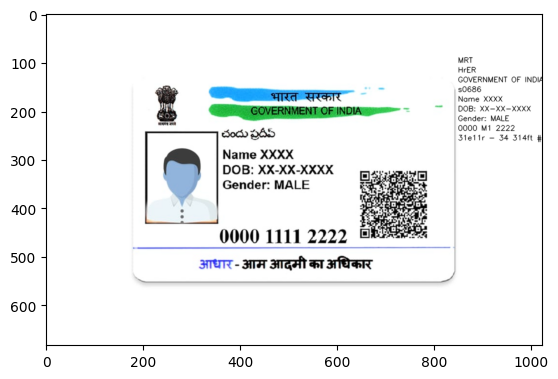

In [57]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    #img= cv2.rectangle(img, tuple(top_left), tuple(bottom_right), (0, 255, 0), 2)
    #img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(850,spacer), font, 0.5,(0,0,0),1,cv2.LINE_AA)
    detected_text_list.append(text)
    spacer+=20
    
plt.imshow(img)
plt.show()

In [55]:
file_path = 'detected_text.txt'
with open(file_path, 'w') as file:
    for text in detected_text_list:
        file.write(text + '\n')

print(f"Detected text saved to '{file_path}'.")

Detected text saved to 'detected_text.txt'.


In [49]:
detected_text_list= [detected_text_list[3],detected_text_list[6]]

IndexError: list index out of range

In [48]:
detected_text_list

['o', 'K']